In [2]:
import ROOT
import os
ROOT.gErrorIgnoreLevel = ROOT.kWarning+1

Welcome to JupyROOT 6.12/06


In [3]:
files = os.listdir("data")
files

['results-singlemu_306135_1000000-events.root',
 'results-zmu_306091_25000-events.root',
 'results-singlemu_306092_1000000-events.root',
 'results-zerobias_306091_1000000-events.root',
 'results-singlemu_306154_1000000-events.root',
 'results-zmu_316995_25000-events.root',
 'results-zmu_317661_25000-events.root']

In [4]:
zb = ('ZeroBias Run 306091', 'results-zerobias_306091_1000000-events.root')
sm = ('SingleMuon Run 306092', 'results-singlemu_306092_1000000-events.root')
zmu0 = ('ZMu Run 316995', 'results-zmu_316995_25000-events.root')
zmu1 = ('ZMu Run 317661', 'results-zmu_317661_25000-events.root')

In [5]:
ds = zmu1
dataset_name = ds[0]
dataset = ROOT.TFile("data/{}".format(ds[1]))

In [6]:
try:
    os.mkdir("pngs/{}/bx0".format(dataset_name.replace(' ', '_')))
    os.mkdir("pngs/{}".format(dataset_name.replace(' ', '_')))
    os.mkdir("pngs/{}/emtfsmuqual".format(dataset_name.replace(' ', '_')))
    os.mkdir("pngs/{}/notemtfsmuqual".format(dataset_name.replace(' ', '_')))
    os.mkdir("pngs/{}/chambers".format(dataset_name.replace(' ', '_')))
except OSError as e:
    pass

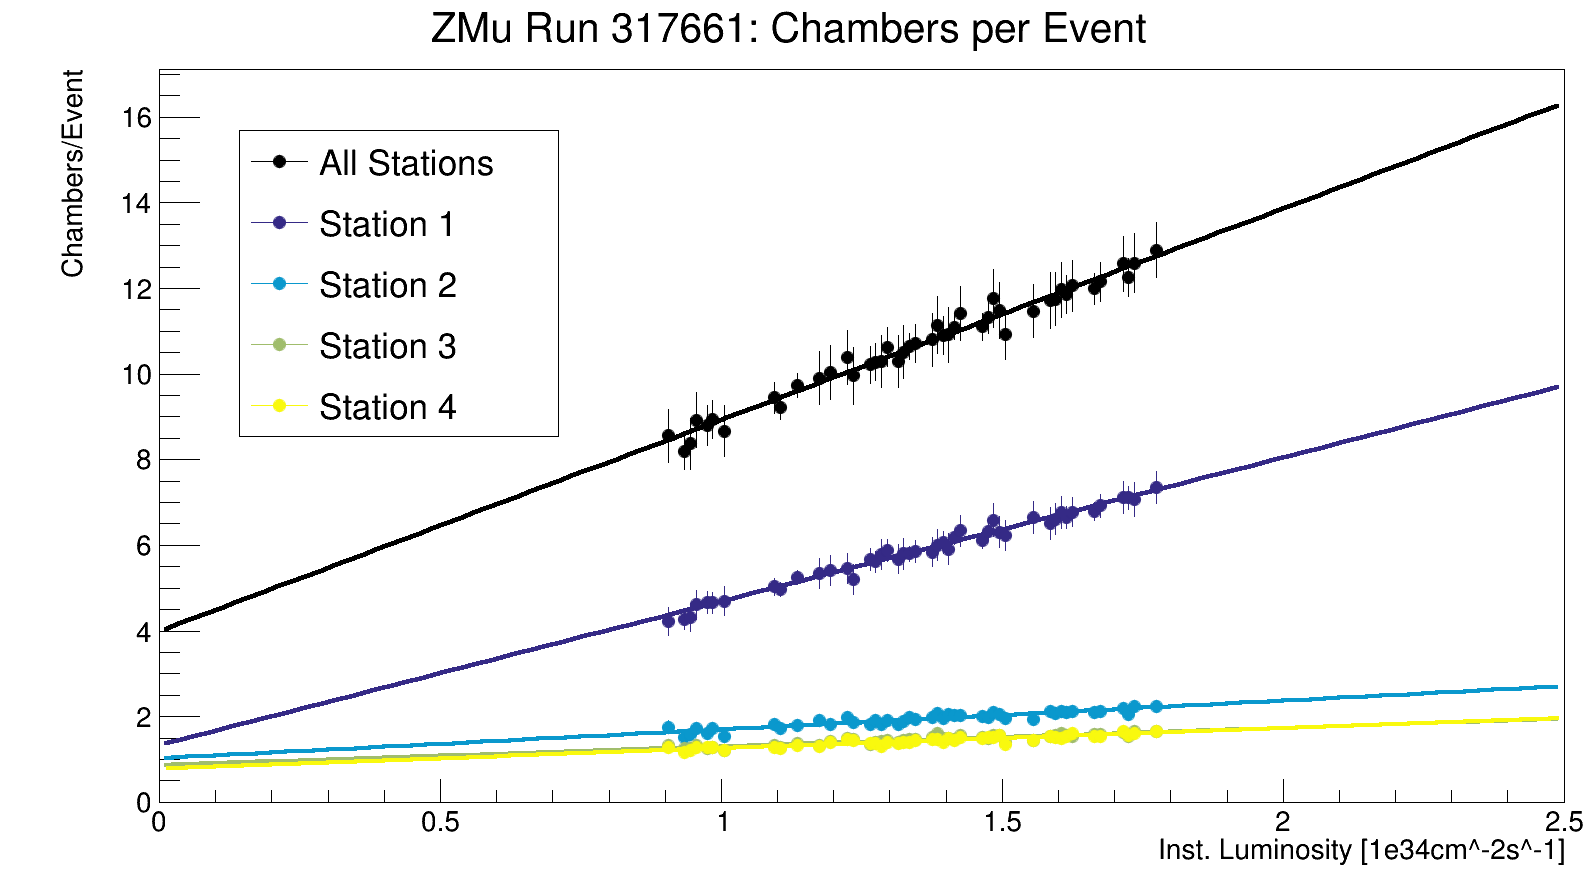

In [6]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
#ROOT.gStyle.SetPalette(ROOT.kCool)
#ROOT.TColor.InvertPalette()

cpe_dir = dataset.Get('All-Event-ChambersPerEvent/byDelLumi')

h0 = cpe_dir.GetKey('all-event-chambers-per-event_by_dellumi_in_me+-all/all').ReadObj()
h1 = cpe_dir.GetKey('all-event-chambers-per-event_by_dellumi_in_me+-1/all').ReadObj()
h2 = cpe_dir.GetKey('all-event-chambers-per-event_by_dellumi_in_me+-2/all').ReadObj()
h3 = cpe_dir.GetKey('all-event-chambers-per-event_by_dellumi_in_me+-3/all').ReadObj()
h4 = cpe_dir.GetKey('all-event-chambers-per-event_by_dellumi_in_me+-4/all').ReadObj()

h0.SetLineColor(ROOT.kBlack)

offset = 0
h0.GetFunction("pol1").SetLineColor(ROOT.kBlack)
h1.GetFunction("pol1").SetLineColor(ROOT.gStyle.GetColorPalette(255//3 * 0))
h2.GetFunction("pol1").SetLineColor(ROOT.gStyle.GetColorPalette(255//3 * 1))
h3.GetFunction("pol1").SetLineColor(ROOT.gStyle.GetColorPalette(255//3 * 2))
h4.GetFunction("pol1").SetLineColor(ROOT.gStyle.GetColorPalette(255//3 * 3 - 1))

for h in [h0, h1, h2, h3, h4]:
    h.GetFunction("pol1").SetLineWidth(4)
    h.SetMarkerSize(1.5)
    h.SetMarkerStyle(ROOT.kFullCircle)

#h0.SetMarkerStyle(ROOT.kFullSquare)
#h1.SetMarkerStyle(ROOT.kFullCircle)
#h2.SetMarkerStyle(ROOT.kFullSquare)
#h3.SetMarkerStyle(ROOT.kFullTriangleUp)
#h4.SetMarkerStyle(ROOT.kFullTriangleDown)

c = ROOT.TCanvas("cpe_lines", "CPE Lines", 1600, 900)
c.SetMargin(0.1, 0.02, 0.08, 0.08)
h0.Draw("")
h1.Draw("same PLC PMC")
h2.Draw("same PLC PMC")
h3.Draw("same PLC PMC")
h4.Draw("same PLC PMC")

h0.SetTitle("All Stations")
h1.SetTitle("Station 1")
h2.SetTitle("Station 2")
h3.SetTitle("Station 3")
h4.SetTitle("Station 4")

h0.GetYaxis().SetTitle("Chambers/Event")
h0.GetXaxis().SetTitle("Inst. Luminosity [1e34cm^-2s^-1]")

ROOT.gPad.BuildLegend(0.15, 0.5, 0.35, 0.85)
h0.SetTitle("{}: Chambers per Event".format(dataset_name))
c.Draw()
c.SaveAs('pngs/{}/cpe_summary.png'.format(dataset_name.replace(' ', '_')))




In [8]:
tpave_loc = (0.65, 0.15, 0.95, 0.35)

0 5.867354465858391
5 30.54157812743293
7.5 42.8786899582202

****************************************
Minimizer is Linear
Chi2                      =      4.47466
NDf                       =           43
p0                        =      5.86735   +/-   0.659369    
p1                        =      4.93484   +/-   0.485711    


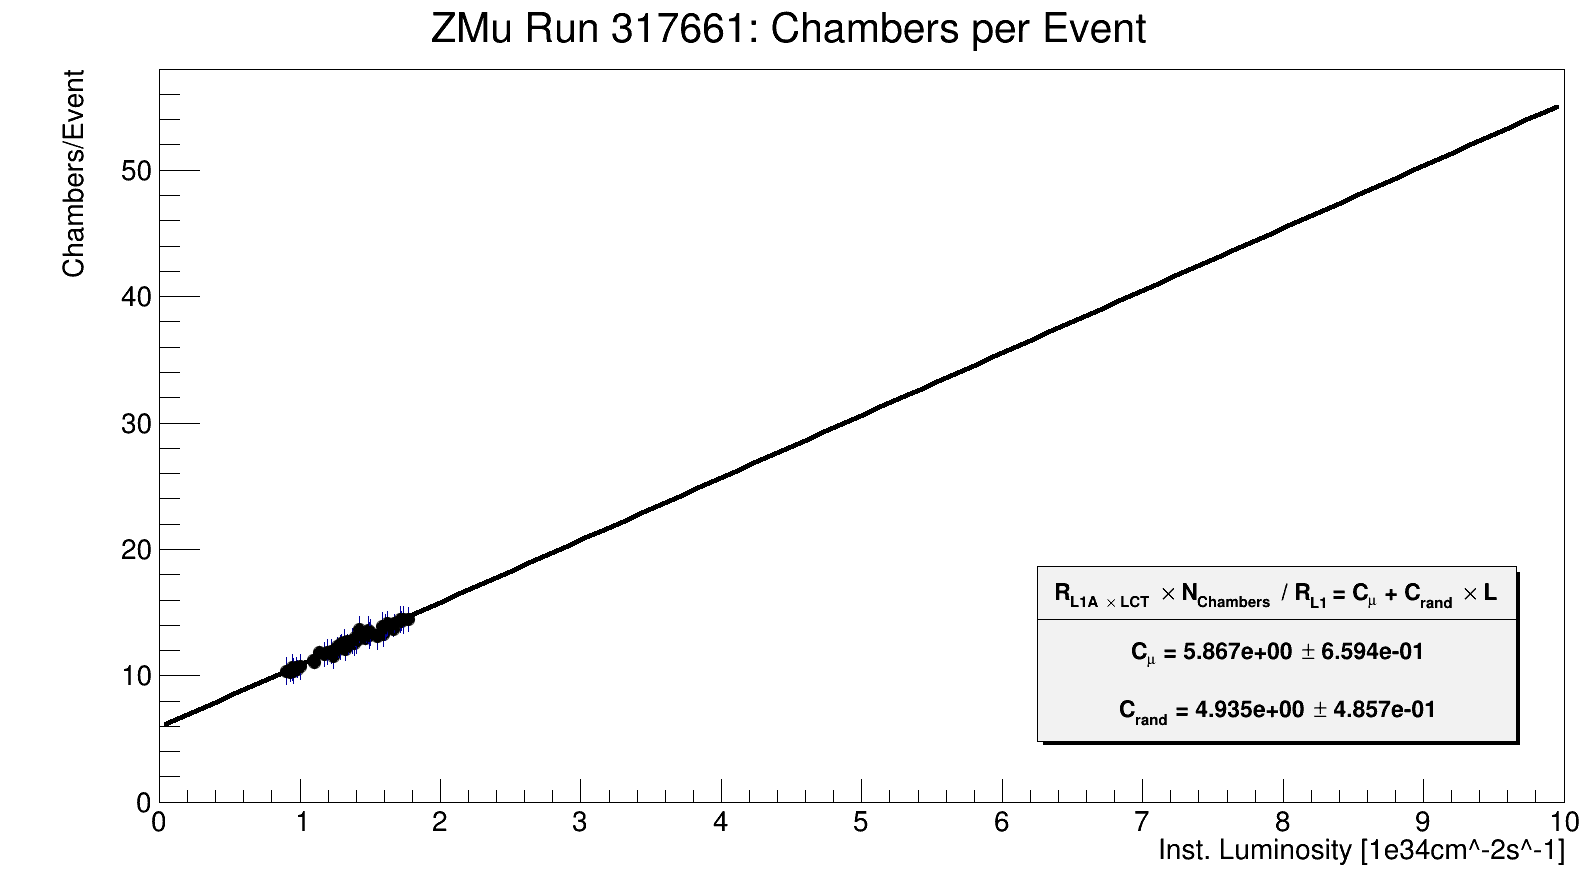

In [8]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
#ROOT.gStyle.SetPalette(ROOT.kCool)
#ROOT.TColor.InvertPalette()

cpe_dir = dataset.Get('EMTF-SMuQual-Event-ChambersPerEvent/byDelLumi')

h = cpe_dir.GetKey('emtf-smuqual-event-chambers-per-event_by_dellumi_in_me+-all/all').ReadObj()
h0 = ROOT.TH1D('cpe_by_dellumi_in_me+-all/all_expanded', "", 1000, 0, 10)
h0.Add(h)
h0.Sumw2()
h0.Fit('pol1')

func = h0.GetFunction("pol1")
h0.GetFunction("pol1").SetLineColor(ROOT.kBlack)
h0.GetFunction("pol1").SetLineWidth(4)
h0.SetMarkerSize(1.5)
h0.SetMarkerStyle(ROOT.kFullCircle)

c = ROOT.TCanvas("cpe_lines", "CPE Lines", 1600, 900)
c.SetMargin(0.1, 0.02, 0.08, 0.08)
h0.Draw("")
h0.SetTitle("{}: Chambers per Event".format(dataset_name))
h0.GetYaxis().SetTitle("Chambers/Event")
h0.GetXaxis().SetTitle("Inst. Luminosity [1e34cm^-2s^-1]")

tpave = ROOT.TPaveText(*tpave_loc, 'NDC')
tpave.AddText("R_{L1A #times LCT} #times N_{Chambers} / R_{L1} = C_{#mu} + C_{rand} #times L")
tpave.AddLine(0,0.7,0,0.7)
tpave.AddText("C_{{#mu}} = {:.3e} #pm {:.3e}".format(func.GetParameter(0), func.GetParError(0)))
tpave.AddText("C_{{rand}} = {:.3e} #pm {:.3e}".format(func.GetParameter(1), func.GetParError(1)))
tpave.Draw()

c.SaveAs('pngs/{}/cpe_extended.png'.format(dataset_name.replace(' ', '_')))
c.Draw()

print(0, func(0))
print(5, func(5))
print(7.5, func(7.5))

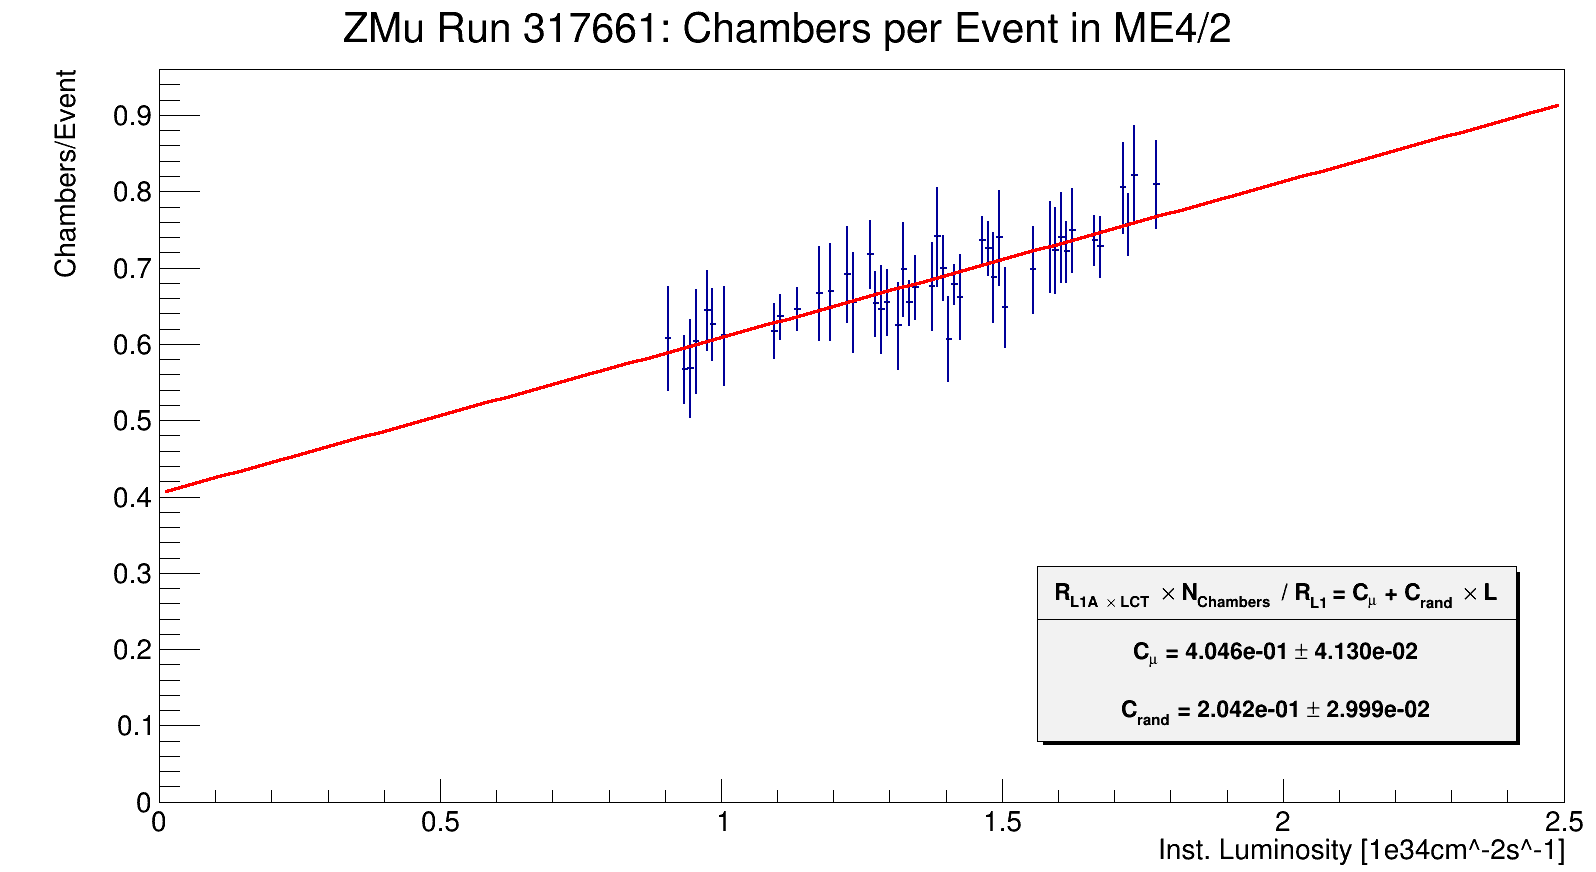

In [9]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)

cpe_dir = dataset.Get('All-Event-ChambersPerEvent/byDelLumi')

for stat in ['all', '1', '2', '3', '4']:
    for ring in ['all', '1', '2', '3']:
        try:
            h1 = cpe_dir.GetKey('all-event-chambers-per-event_by_dellumi_in_me+-{}/{}'.format(stat,ring)).ReadObj()
        except:
            continue
        func = h1.GetFunction("pol1")
        
        c = ROOT.TCanvas("cpe_individual", "CPE Individual", 1600, 900)
        c.SetMargin(0.1, 0.02, 0.08, 0.08)
        h1.Draw("")

        h1.GetXaxis().SetTitle("Inst. Luminosity [1e34cm^-2s^-1]")
        h1.GetYaxis().SetTitle("Chambers/Event")
        h1.SetTitle("{}: Chambers per Event in ME{}/{}".format(dataset_name, stat, ring))

        h1.SetLineWidth(2)
        func.SetLineWidth(3)
        
        tpave = ROOT.TPaveText(*tpave_loc, 'NDC')
        tpave.AddText("R_{L1A #times LCT} #times N_{Chambers} / R_{L1} = C_{#mu} + C_{rand} #times L")
        tpave.AddLine(0,0.7,0,0.7)
        tpave.AddText("C_{{#mu}} = {:.3e} #pm {:.3e}".format(func.GetParameter(0), func.GetParError(0)))
        tpave.AddText("C_{{rand}} = {:.3e} #pm {:.3e}".format(func.GetParameter(1), func.GetParError(1)))
        tpave.Draw()

        c.Draw()
        c.SaveAs('pngs/{}/stat-{}_ring-{}.png'.format(dataset_name.replace(' ', '_'), stat, ring))


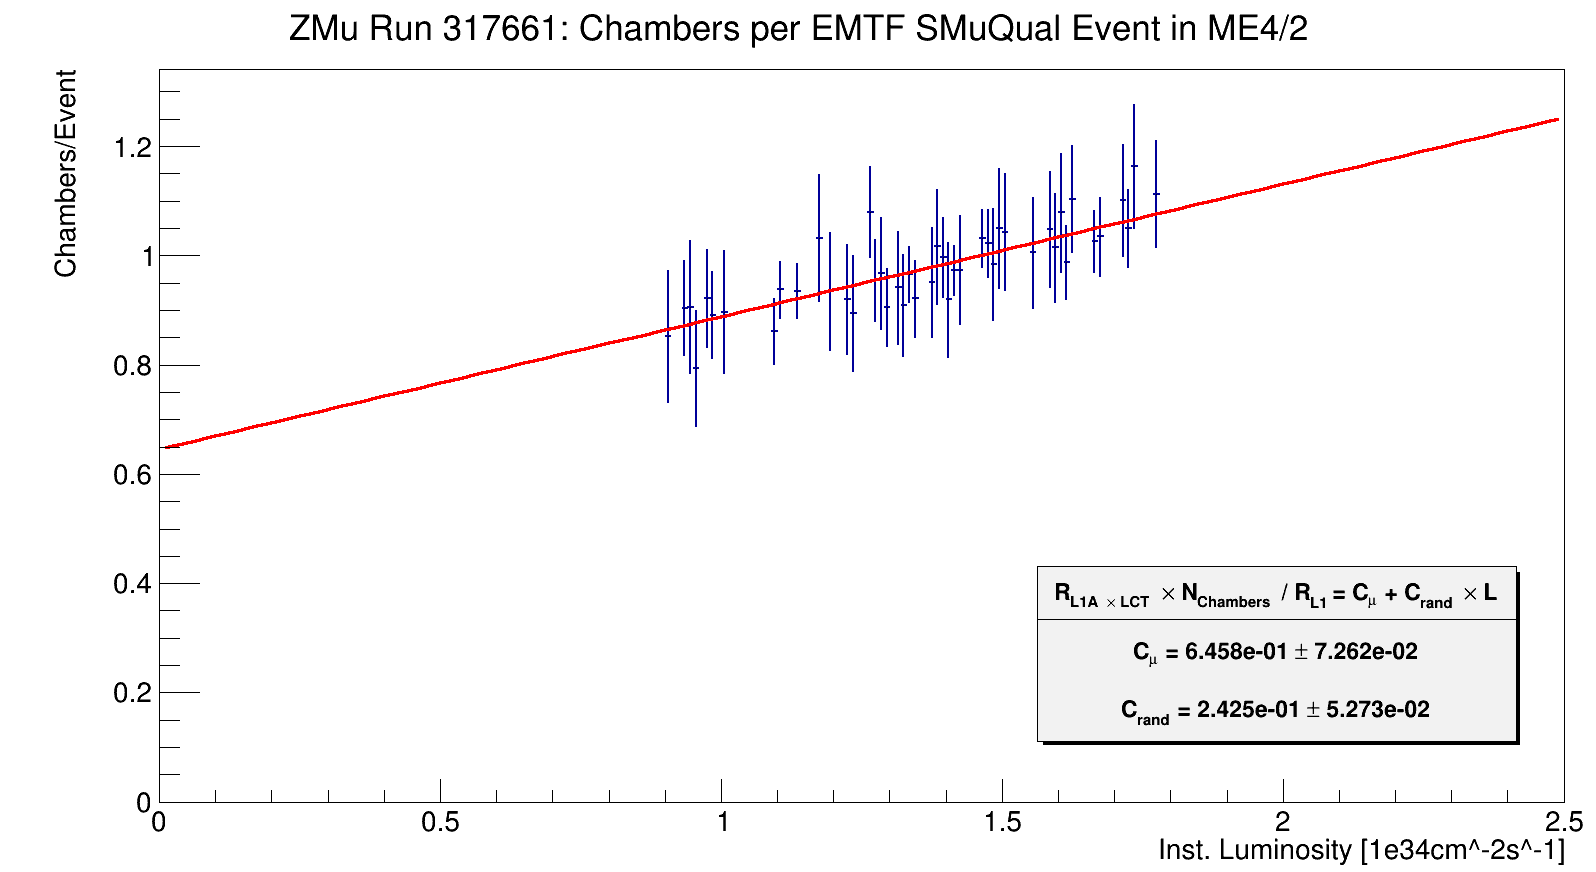

In [10]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)

cpe_dir = dataset.Get('EMTF-SMuQual-Event-ChambersPerEvent/byDelLumi')

for stat in ['all', '1', '2', '3', '4']:
    for ring in ['all', '1', '2', '3']:
        try:
            h1 = cpe_dir.GetKey('emtf-smuqual-event-chambers-per-event_by_dellumi_in_me+-{}/{}'.format(stat,ring)).ReadObj()
        except:
            continue
        func = h1.GetFunction("pol1")

        c = ROOT.TCanvas("cpe_individual", "CPE Individual", 1600, 900)
        c.SetMargin(0.1, 0.02, 0.08, 0.08)
        h1.Draw("")

        h1.GetXaxis().SetTitle("Inst. Luminosity [1e34cm^-2s^-1]")
        h1.GetYaxis().SetTitle("Chambers/Event")
        h1.SetTitle("{}: Chambers per EMTF SMuQual Event in ME{}/{}".format(dataset_name, stat, ring))
        
        h1.SetLineWidth(2)
        func.SetLineWidth(3)
        
        tpave = ROOT.TPaveText(*tpave_loc, 'NDC')
        tpave.AddText("R_{L1A #times LCT} #times N_{Chambers} / R_{L1} = C_{#mu} + C_{rand} #times L")
        tpave.AddLine(0,0.7,0,0.7)
        tpave.AddText("C_{{#mu}} = {:.3e} #pm {:.3e}".format(func.GetParameter(0), func.GetParError(0)))
        tpave.AddText("C_{{rand}} = {:.3e} #pm {:.3e}".format(func.GetParameter(1), func.GetParError(1)))
        tpave.Draw()

        c.Draw()
        c.SaveAs('pngs/{}/{}/stat-{}_ring-{}.png'.format(dataset_name.replace(' ', '_'), 'emtfsmuqual', stat, ring))


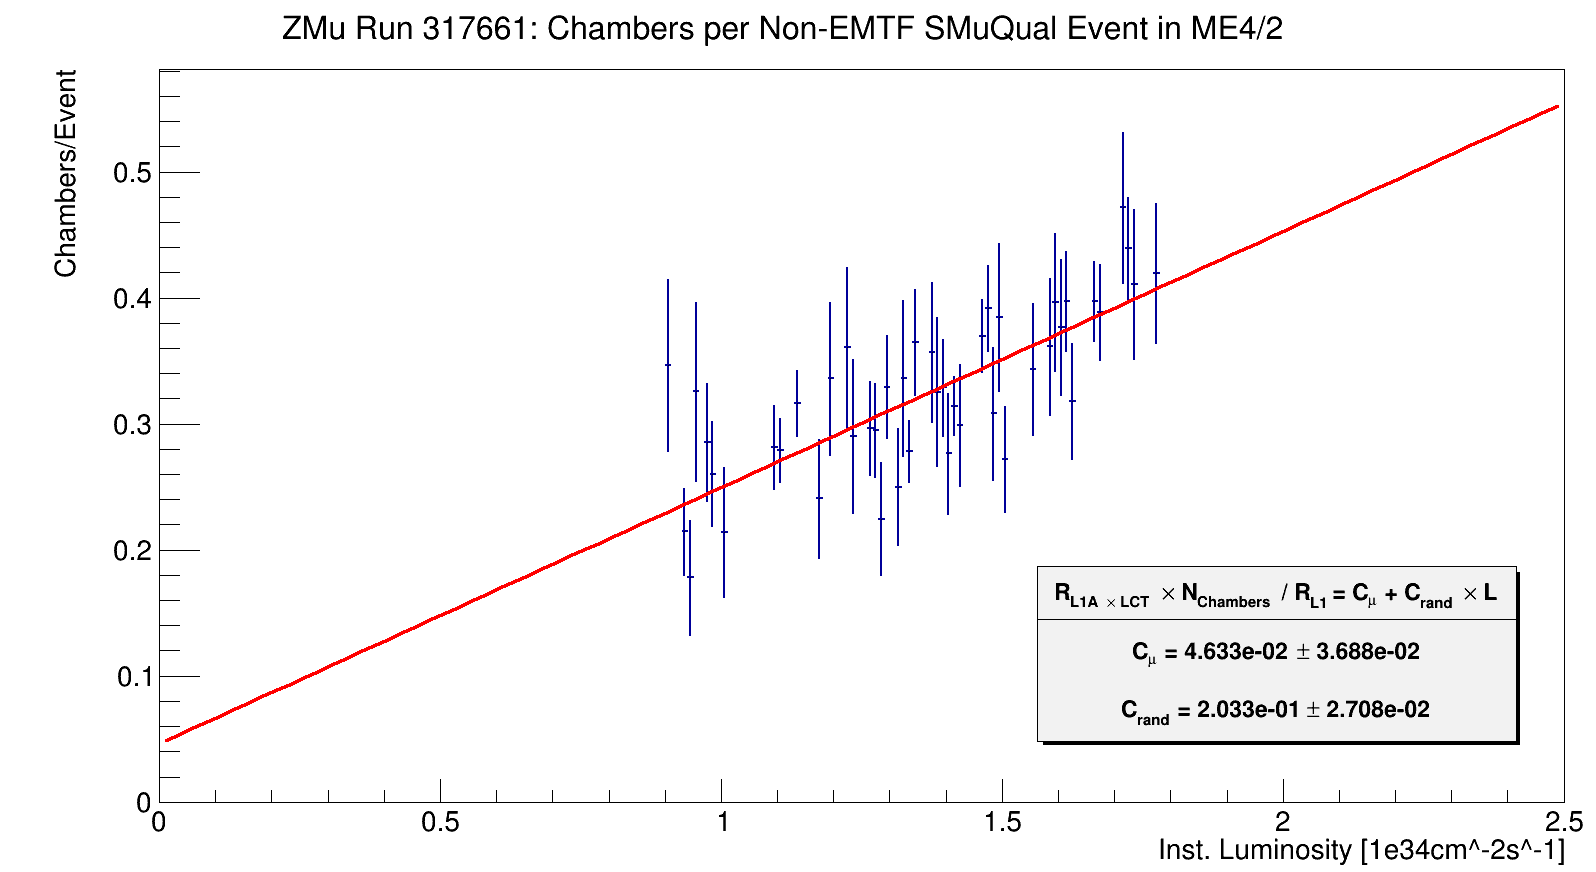

In [11]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)

cpe_dir = dataset.Get('Not-EMTF-SMuQual-Event-ChambersPerEvent/byDelLumi')

for stat in ['all', '1', '2', '3', '4']:
    for ring in ['all', '1', '2', '3']:
        try:
            h1 = cpe_dir.GetKey('not-emtf-smuqual-event-chambers-per-event_by_dellumi_in_me+-{}/{}'.format(stat,ring)).ReadObj()
        except:
            continue
        func = h1.GetFunction("pol1")

        c = ROOT.TCanvas("cpe_individual", "CPE Individual", 1600, 900)
        c.SetMargin(0.1, 0.02, 0.08, 0.08)
        h1.Draw("")

        h1.GetXaxis().SetTitle("Inst. Luminosity [1e34cm^-2s^-1]")
        h1.GetYaxis().SetTitle("Chambers/Event")
        h1.SetTitle("{}: Chambers per Non-EMTF SMuQual Event in ME{}/{}".format(dataset_name, stat, ring))
        
        h1.SetLineWidth(2)
        func.SetLineWidth(3)
        
        tpave = ROOT.TPaveText(*tpave_loc, 'NDC')
        tpave.AddText("R_{L1A #times LCT} #times N_{Chambers} / R_{L1} = C_{#mu} + C_{rand} #times L")
        tpave.AddLine(0,0.7,0,0.7)
        tpave.AddText("C_{{#mu}} = {:.3e} #pm {:.3e}".format(func.GetParameter(0), func.GetParError(0)))
        tpave.AddText("C_{{rand}} = {:.3e} #pm {:.3e}".format(func.GetParameter(1), func.GetParError(1)))
        tpave.Draw()

        c.Draw()
        c.SaveAs('pngs/{}/{}/stat-{}_ring-{}.png'.format(dataset_name.replace(' ', '_'), 'notemtfsmuqual', stat, ring))


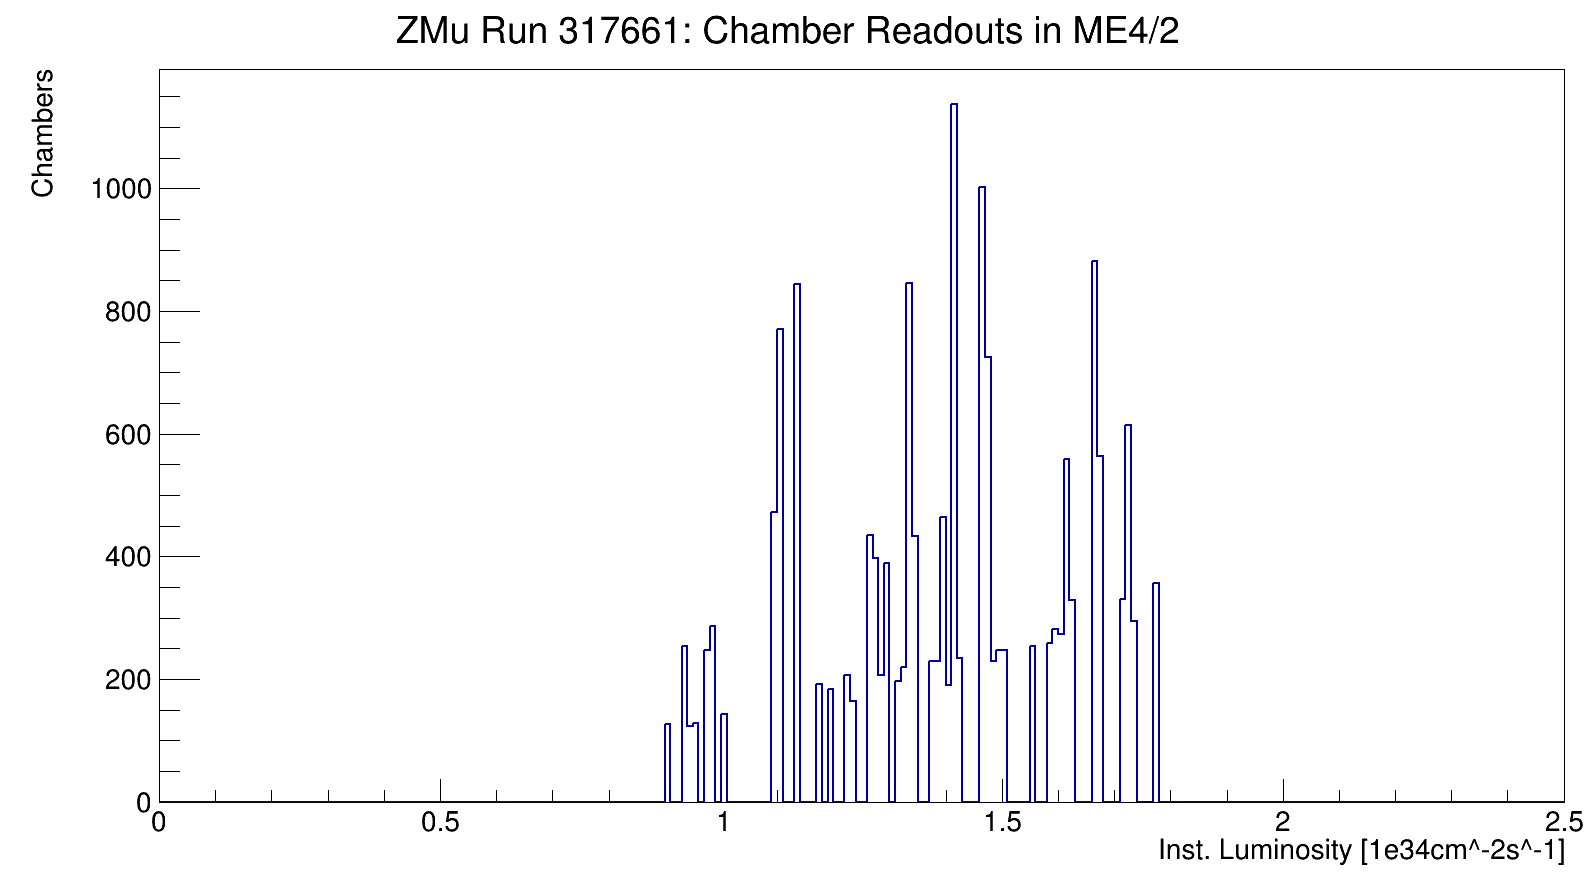

In [12]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)

cpe_dir = dataset.Get('All-Event-Chambers/byDelLumi')

for stat in ['all', '1', '2', '3', '4']:
    for ring in ['all', '1', '2', '3']:
        try:
            h1 = cpe_dir.GetKey('all-event-chambers_by_dellumi_in_me+-{}/{}'.format(stat,ring)).ReadObj()
        except:
            continue
        
        c = ROOT.TCanvas("cpe_individual", "CPE Individual", 1600, 900)
        c.SetMargin(0.1, 0.02, 0.08, 0.08)
        h1.Draw("HIST")
        h1.SetLineWidth(2)

        h1.GetXaxis().SetTitle("Inst. Luminosity [1e34cm^-2s^-1]")
        h1.GetYaxis().SetTitle("Chambers")
        h1.SetTitle("{}: Chamber Readouts in ME{}/{}".format(dataset_name, stat, ring))

        c.Draw()
        c.SaveAs('pngs/{}/{}/stat-{}_ring-{}.png'.format(dataset_name.replace(' ', '_'), 'chambers', stat, ring))


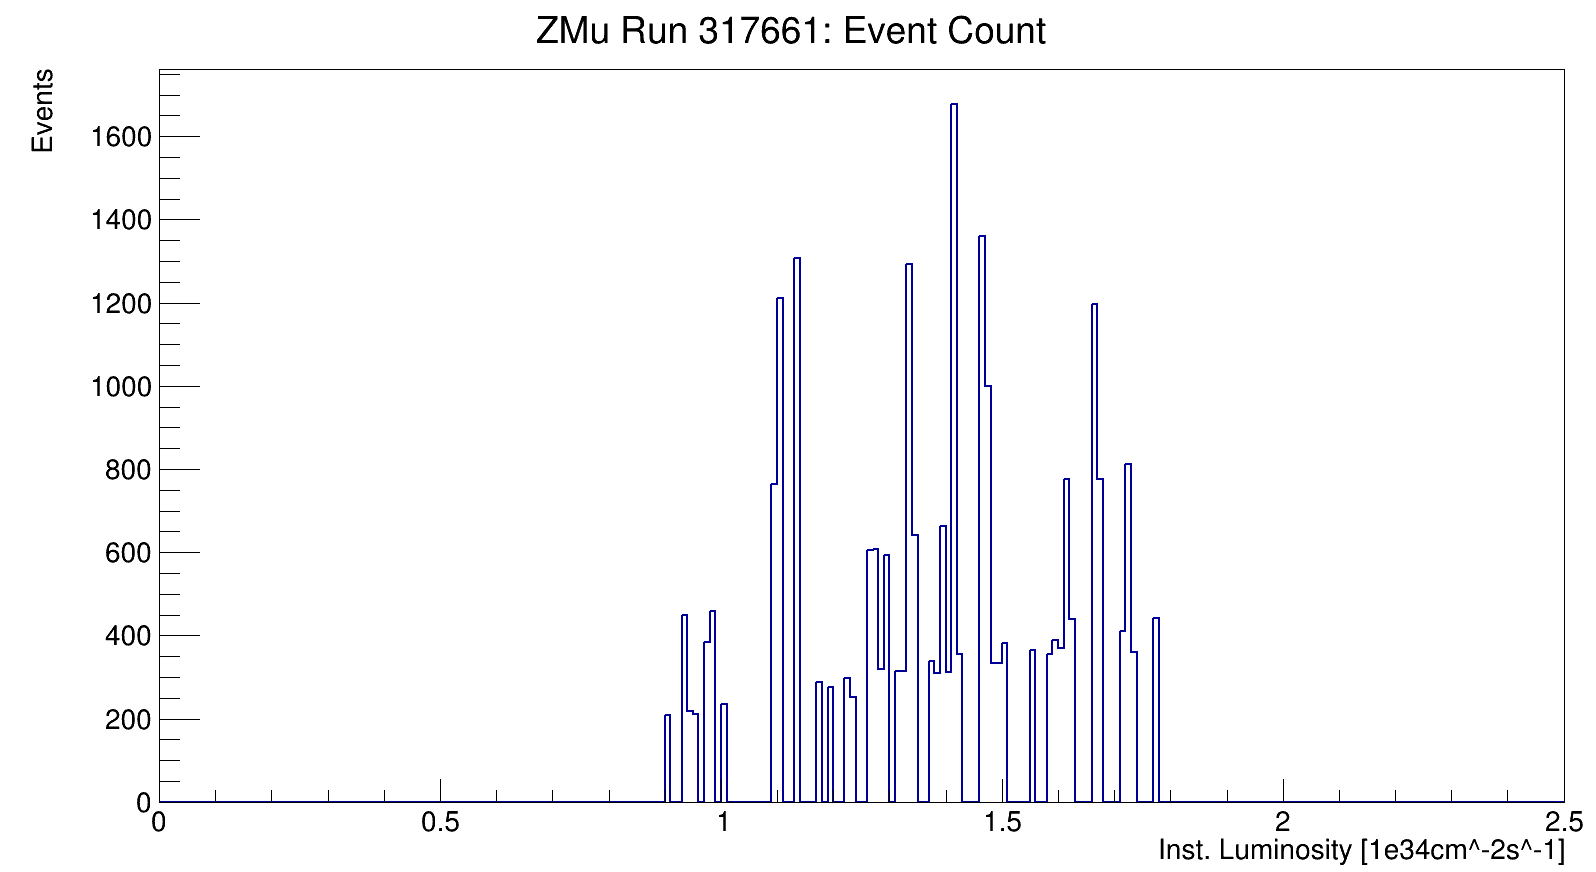

In [13]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)

#cpe_dir = dataset.Get('Events/byDelLumi')

h1 = dataset.GetKey('all-event_by_dellumi'.format(stat,ring)).ReadObj()


c = ROOT.TCanvas("cpe_individual", "CPE Individual", 1600, 900)
c.SetMargin(0.1, 0.02, 0.08, 0.08)
h1.Draw("HIST")
h1.SetLineWidth(2)

h1.GetXaxis().SetTitle("Inst. Luminosity [1e34cm^-2s^-1]")
h1.GetYaxis().SetTitle("Events")
h1.SetTitle("{}: Event Count".format(dataset_name, stat, ring))

c.Draw()
c.SaveAs('pngs/{}/events.png'.format(dataset_name.replace(' ', '_'), 'chambers', stat, ring))


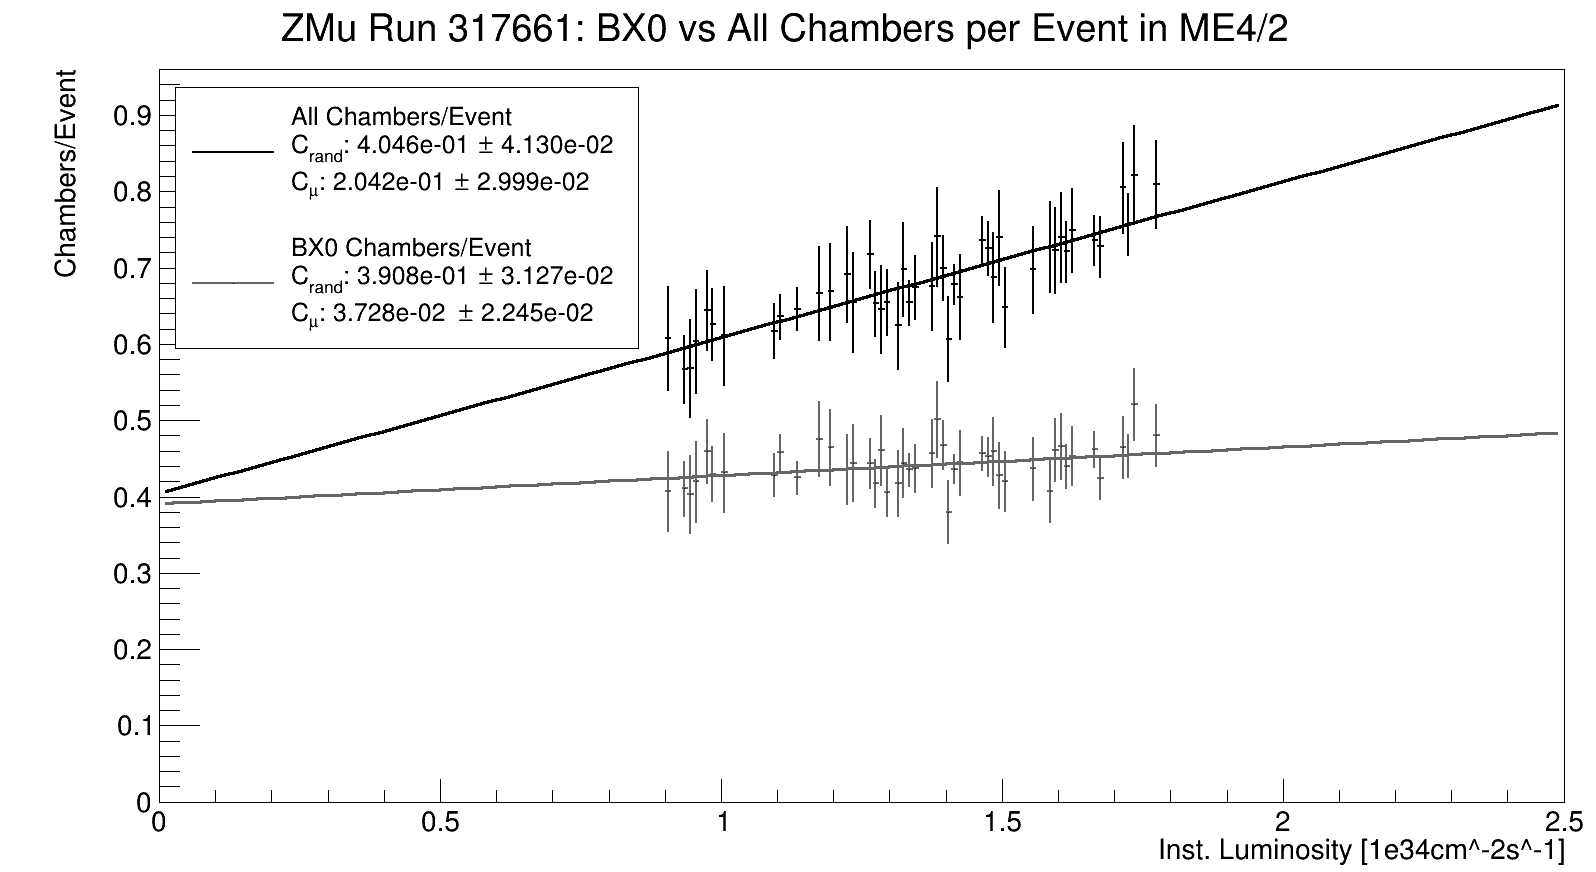

In [40]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)

cpe_dir = dataset.Get('All-Event-ChambersPerEvent/byDelLumi')
bx0_cpe_dir = dataset.Get('All-Event-BX0-ChambersPerEvent/byDelLumi')

for stat in ['all', '1', '2', '3', '4']:
    for ring in ['all', '1', '2', '3']:
        try:
            h0 = cpe_dir.GetKey('all-event-chambers-per-event_by_dellumi_in_me+-{}/{}'.format(stat,ring)).ReadObj()
            h1 = bx0_cpe_dir.GetKey('all-event-bx0-chambers-per-event_by_dellumi_in_me+-{}/{}'.format(stat,ring)).ReadObj()
        except:
            continue
        
        func0 = h0.GetFunction("pol1")
        func1 = h1.GetFunction("pol1")
        
        c = ROOT.TCanvas("cpe_individual", "CPE Individual", 1600, 900)
        c.SetMargin(0.1, 0.02, 0.08, 0.08)
        h0.Draw("")
        h1.Draw("SAME")
        
        h0.SetTitle("#splitline{{All Chambers/Event}}{{#splitline{{C_{{rand}}: {:.3e} #pm {:.3e}   }}{{C_{{#mu}}: {:.3e} #pm {:.3e}}}}}".format(
                                                                               func0.GetParameter(0), 
                                                                               func0.GetParError(0), 
                                                                               func0.GetParameter(1),
                                                                               func0.GetParError(1)))
        h1.SetTitle("#splitline{{BX0 Chambers/Event}}{{#splitline{{C_{{rand}}: {:.3e} #pm {:.3e}   }}{{C_{{#mu}}: {:.3e} #pm {:.3e}}}}}".format(
                                                                               func1.GetParameter(0), 
                                                                               func1.GetParError(0), 
                                                                               func1.GetParameter(1),
                                                                               func1.GetParError(1)))

        h0.GetXaxis().SetTitle("Inst. Luminosity [1e34cm^-2s^-1]")
        h0.GetYaxis().SetTitle("Chambers/Event")

        h0.SetLineColor(ROOT.kBlack)
        h1.SetLineColor(ROOT.kGray+2)
        
        h0.SetLineWidth(2)
        h1.SetLineWidth(2)

        func0.SetLineColor(ROOT.kBlack)
        func1.SetLineColor(ROOT.kGray+2)
        
        func0.SetLineWidth(3)
        func1.SetLineWidth(3)
        
        tpave = ROOT.TPaveText(*tpave_loc, 'NDC')
        #tpave.AddText("R_{L1A #times LCT} #times N_{Chambers} / R_{L1} = C_{#mu} + C_{rand} #times L")
        #tpave.AddLine(0,0.7,0,0.7)\
        
        tpave.AddText("All C_{{rand}} = {:.3e} #pm {:.3e}".format(func0.GetParameter(1), func0.GetParError(1)))
        tpave.AddText("BX0 C_{{rand}} = {:.3e} #pm {:.3e}".format(func1.GetParameter(1), func1.GetParError(1)))
        tpave.AddLine(0,0.5,0,0.5)
        tpave.AddText("All C_{{#mu}} = {:.3e} #pm {:.3e}".format(func0.GetParameter(0), func0.GetParError(0)))
        tpave.AddText("BX0 C_{{#mu}} = {:.3e} #pm {:.3e}".format(func1.GetParameter(0), func1.GetParError(0)))
        #tpave.Draw()

        ROOT.gPad.BuildLegend(0.11, 0.6, 0.4, 0.9)        
        h0.SetTitle("{}: BX0 vs All Chambers per Event in ME{}/{}".format(dataset_name, stat, ring))
        c.Draw()
        c.Update()
        c.SaveAs('pngs/{}/bx0/stat-{}_ring-{}.png'.format(dataset_name.replace(' ', '_'), stat, ring))
